Each gray box with 

    In []:
    
beside it is a bit of computer code and you run then by pressing the play button or pressing "Shift-Enter". 

In [ ]:
#this is a comment - the computer will remember it but not act on it.
print("this is a command or function, it tells the computer to print out the text")

In [ ]:
#try to display "hello world":
print("hello world")

In [ ]:
#these commands setup our python environment for scientific programming and plotting
%pylab
%matplotlib inline
import astropy.io.fits as fits

rcParams['image.cmap'] = 'viridis' 
plt.xkcd() #this gives us squiggly XKCD style figures (http://matplotlib.org/xkcd/examples/showcase/xkcd.html)

## Just like algebra

We can assign a number to a variable and do math

In [ ]:

x = 2
a = 3.5
y = x + a

print(y)




In [ ]:
#you can skip a step and do math inside the print function:
print(y/x)

### The it remembered our variables from one box to the next --- spooky?

## Debugging

In [21]:
print(z)
z=x*a


NameError: name 'z' is not defined

# we can do lots of math at once

This is good -- astronomers are lazy

In [ ]:

x=array([3,2,5,2,2,2,2,1])
a=array([5,5,5,5,5,5,5,5,])
SubtractedArrays=a-x
print(SubtractedArrays)

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


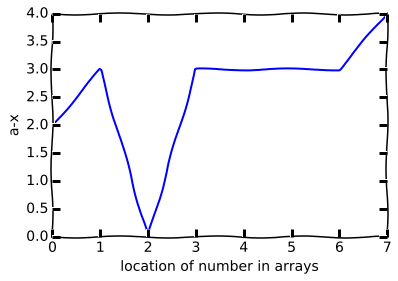

In [22]:
plot(SubtractedArrays)
plt.xlabel("location of number in arrays")
plt.ylabel("a-x")

## Just look at the first four numbers

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


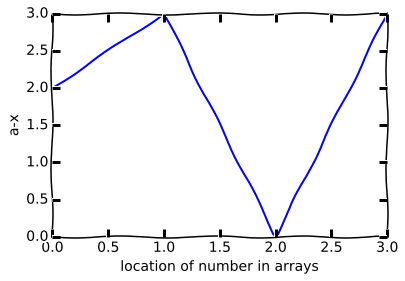

In [23]:
plot(SubtractedArrays[:4])
plt.xlabel("location of number in arrays")
plt.ylabel("a-x")

## print the original array and see if it as has changed:

In [24]:
SubtractedArrays

array([2, 3, 0, 3, 3, 3, 3, 4])

## Let's get some real data
Last night we collected some images of the interacting galaxies NGC 6240

(https://en.wikipedia.org/wiki/NGC_6240)

In [25]:
image = fits.getdata("data/wiyn0_9/2016june18/NGC6240/c7558t0054o00.fits")


/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


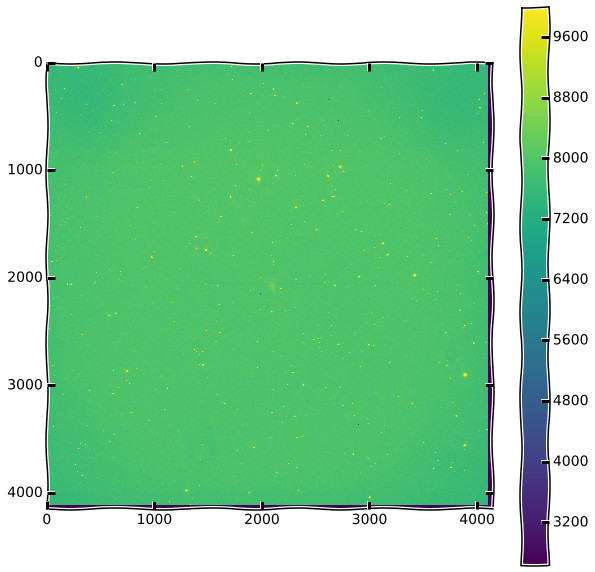

In [29]:
#decrease the vmax until you can see the galaxies
figure(figsize=(10,10))
imshow(image,vmax=10000)
colorbar()

## more debugging -- getting help


In [30]:
#you can call a function with a ? to get help on it.
imshow?

## Removing Bias levels
per the HDI reduction guide, it's preferable to subtract an average bias from the frame than to use
one from earlier in the night

"calculate bias 1a.  compute mean value, M, of pixels in overscan columns 4100 - 4140" ( HDI data reduction tutorial
Michael Richmond, July 8, 2014 ,http://stupendous.rit.edu/richmond/wiyn/hdi_oct2013/tech_7/tech_7.html)

In [31]:
#calculate the average bias in the overscan pixels.
overscan=image[4100:4140,4100:4140] 
mean_bias=mean(overscan) #this is the average

image_without_bias = image - mean_bias

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


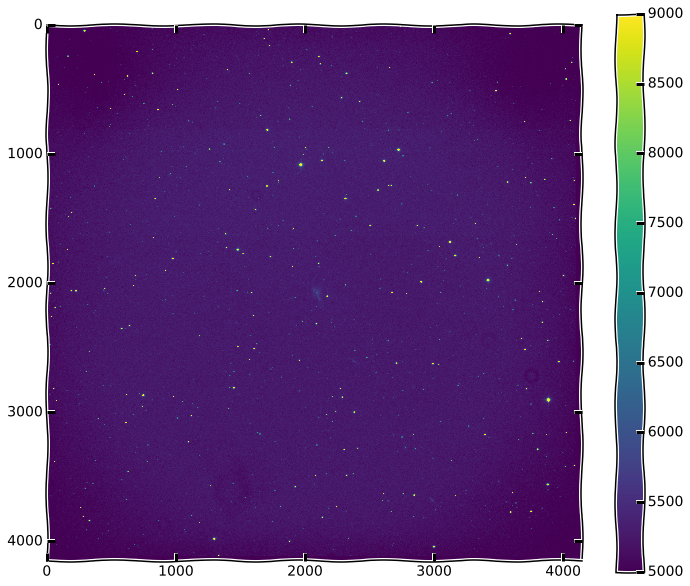

In [32]:
#plot it
figure(figsize=(12,10))
imshow(image_without_bias,vmax=9000,vmin=5000)
colorbar()

## Flat field to correct the dim corners and the donuts due to dust

In [33]:
flat =  fits.getdata("data/wiyn0_9/2016june18/c7558t0010f00.fits")
#Generate a flat field with a mean of one by subtracting the bias:
flat_bias=mean(flat[4100:4140,4100:4140] )
flat = flat - flat_bias
#and dividing by the average:
flat = flat/mean(flat)

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


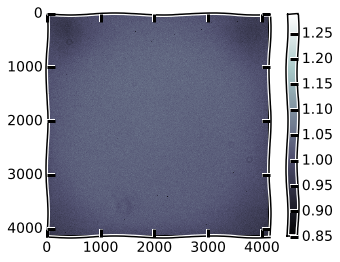

In [42]:
#show the flat field:
imshow(flat,cmap="bone",vmin=0.85)
colorbar()

In [43]:
#divide the image by the flat field:
image_flattened = image_without_bias/flat

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


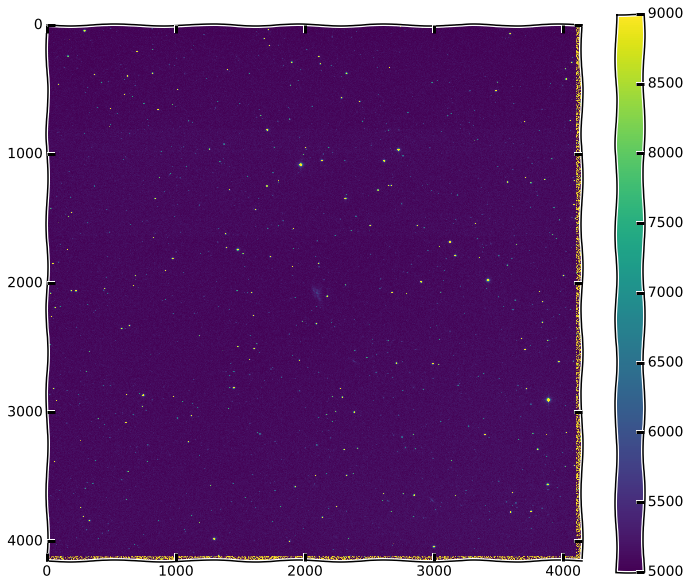

In [45]:
figure(figsize=(12,10))
imshow(image_flattened,vmax=9000,vmin=5000)
colorbar()

## why is the background still so high?

What was in the sky last night?

## Look at just the pixels close to NGC 6240

/home/edouglas/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


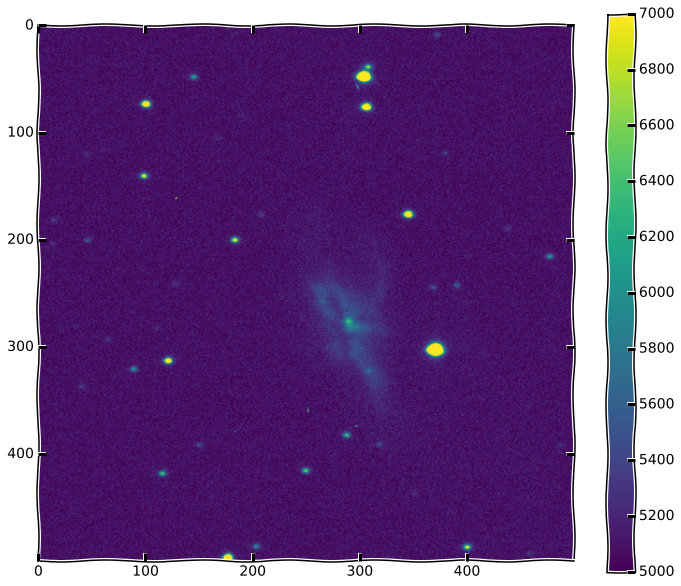

In [49]:
figure(figsize=(12,10))
#just like when we looked at the first four values in an array, look at pixels from 1800 to 2300, in both directions
imshow(image_flattened[1800:2300,1800:2300],vmax=7000,vmin=5000,cmap="viridis")
colorbar()

## TRY THIS AT HOME!

You can install  the Anaconda Scientific python platform on your (Windows/Mac/Linux) computer for **free** and run this  notebook in your web-browser or make your own:

https://www.continuum.io/downloads

Or you can use a webserver operated by a company to run it remotely, such as:
https://cloud.sagemath.com/

A copy of this tutorial for reference:
https://github.com/douglase/astronomy_camp_tutorials/blob/master/Basics%20of%20Python%20and%20Data%20Reduction.ipynb